## 4.2 形態學的侵蝕(Erosion)與膨脹(Dilation)

<a href="https://hackmd.io/@cws0701/B1AxRjijq"> OpenCV 基礎篇-形態學(用於邊界抽取、輪廓處理)</a>

<a href="https://shengyu7697.github.io/python-opencv-erode-dilate/">  OpenCV 影像侵蝕 erode 與影像膨脹 dilate</a>    
使用方式：kernel = cv2.getStructuringElement(shape, ksize)     
指定大小形狀的結構元素，shape 的內容：     
cv2.MORPH_RECT ( 矩形 )、cv2.MORPH_CROSS ( 十字交叉 )、cv2.MORPH_ELLIPSE ( 橢圓形 )      
ksize 的格式：(x, y)       

img = cv2.erode(img, kernel [, iterations=1])   # 侵蝕     
img = cv2.dilate(img, kernel [, iterations=1])  # 擴張      

<a href="https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html">  OpenCV : Morphological Transformations</a> 

### <font color="Red"> Question: 為什麼『侵蝕』看起來像字的擴張、『擴張』看起來像字的侵蝕？

『侵蝕』看起來像字的擴張是因為若該像素點在kernal範圍內全部的像素點皆被erode認定為1(即白色)的話，該像素點會被判定為0，而erode判定像素點是否為0的標準為該像素點不是白色，因此在此範例中字非白色，底為白色的情況下，白色的背景會被侵蝕，非白色的字因此變大。
『擴張』看起來像字的侵蝕是因為若該像素點在kernal範圍內有任意像素點皆被dilate認定為1(即白色)的話，該像素點會被判定為1，而dilate判定像素點是否為0的標準為該像素點不是白色，因此在此範例中字非白色，底為白色的情況下，白色的背景會被擴張，非白色的字因此變小。

Matplotlib is building the font cache; this may take a moment.


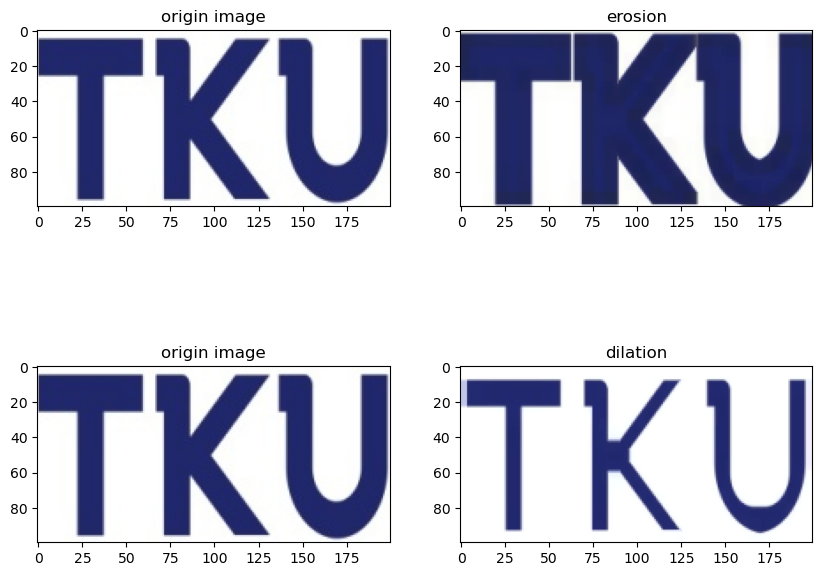

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "TKU2.jpg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
img_erode = cv2.erode(img, kernel)     
img_dilate = cv2.dilate(img, kernel)   

plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)   
plt.title('origin image') 
plt.imshow(img)
plt.subplot(2,2,2)   
plt.title('erosion') 
plt.imshow(img_erode)
plt.subplot(2,2,3)   
plt.title('origin image') 
plt.imshow(img)
plt.subplot(2,2,4)   
plt.title('dilation') 
plt.imshow(img_dilate)

## <font color="Red"> 4.3 單次與多次之差異
    
<font color="Red"> 請使用 TKU3.jpg 影像，比較下列的處理結果，1和2或3哪一個效果比較接近：     
<font color="Red"> 1. 一次7x7的侵蝕與膨脹    
2. 兩次3x3的侵蝕與膨脹   
3. 兩次3x3的侵蝕與膨脹   

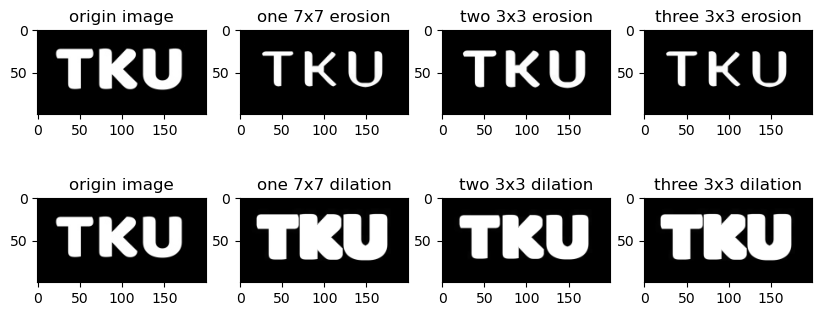

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "TKU3.jpg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]

#------------------------ Code Here -----------------------#
def kernel (i):
    return np.ones((i, i), np.uint8)

img_erode = cv2.erode(img, kernel(7))
img_erode21 = cv2.erode(cv2.erode(img, kernel(3)), kernel(3))
img_erode22 = cv2.erode(img_erode21, kernel(3))

img_dilate = cv2.dilate(img, kernel(7))
img_dilate21 = cv2.dilate(cv2.dilate(img, kernel(3)), kernel(3))
img_dilate22 = cv2.dilate(img_dilate21, kernel(3))
#------------------------ Code Here -----------------------#

plt.figure(figsize=(10, 4))
plt.subplot(2,4,1)   
plt.title('origin image') 
plt.imshow(img)
plt.subplot(2,4,2)   
plt.title('one 7x7 erosion') 
plt.imshow(img_erode)
plt.subplot(2,4,3)   
plt.title('two 3x3 erosion') 
plt.imshow(img_erode21)
plt.subplot(2,4,4) 
plt.title('three 3x3 erosion') 
plt.imshow(img_erode22)

plt.subplot(2,4,5)   
plt.title('origin image') 
plt.imshow(img)
plt.subplot(2,4,6)   
plt.title('one 7x7 dilation') 
plt.imshow(img_dilate)
plt.subplot(2,4,7)   
plt.title('two 3x3 dilation') 
plt.imshow(img_dilate21)
plt.subplot(2,4,8)   
plt.title('three 3x3 dilation') 
plt.imshow(img_dilate22)

## <font color="Red"> 4.5 適當的參數選擇
調整使用方式kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
1. cv2.MORPH_RECT, cv2.MORPH_CROSS, cv2.MORPH_ELLIPSE 
2. kernel size (3,3), (5,5), (7,7), ...    

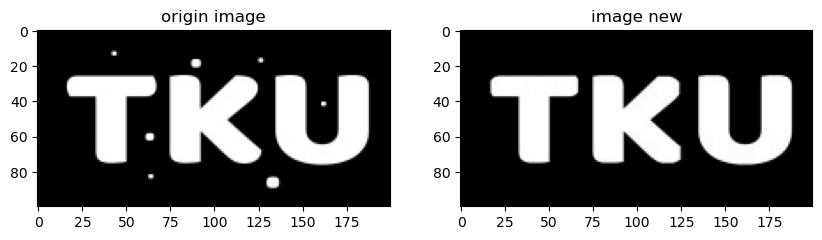

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "TKU5.jpg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
#------------------------ Code Here -----------------------#
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
img_new = cv2.morphologyEx(img, cv2.MORPH_OPEN,kernel) 
#------------------------ Stop Here -----------------------#
img_new = cv2.morphologyEx(img, cv2.MORPH_OPEN,kernel) 

plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)   
plt.title('origin image') 
plt.imshow(img)
plt.subplot(2,2,2)   
plt.title('image new') 
plt.imshow(img_new)
